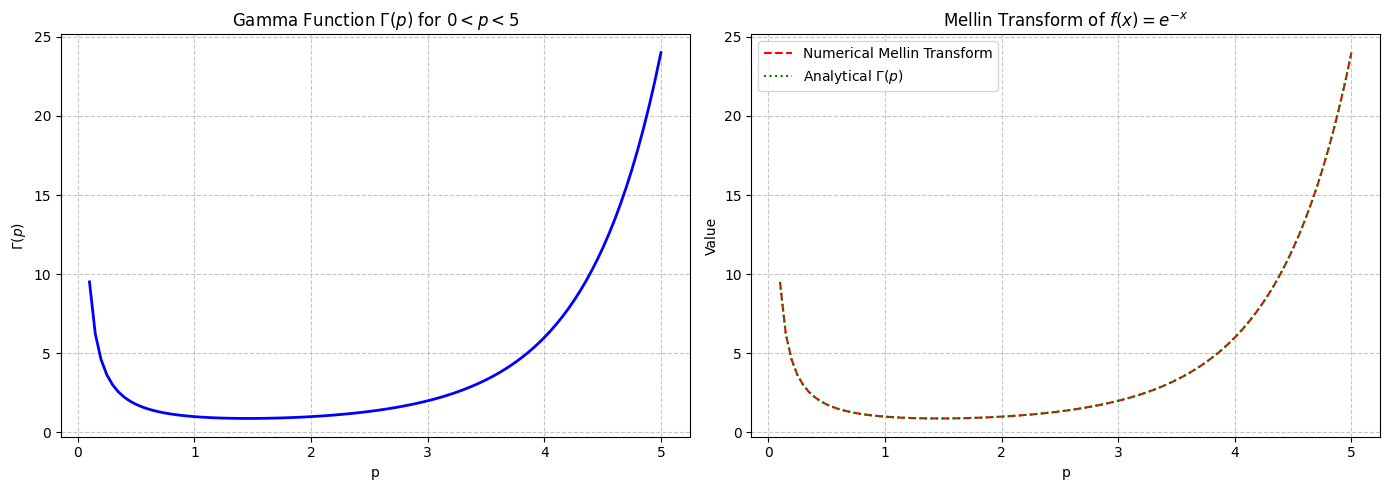

In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.special import gamma
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define Mellin transform for f(x) = e^(-x)
def mellin_transform(f, p):
    return integrate.quad(lambda x: x**(p-1) * f(x), 0, np.inf)[0]

# Define the exponential function
def f(x):
    return np.exp(-x)

# Generate p values (avoid p=0 due to gamma function pole)
p_values = np.linspace(0.1, 5, 100)

# Compute values
gamma_vals = gamma(p_values)
mt_vals = [mellin_transform(f, p) for p in p_values]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot gamma function
ax1.plot(p_values, gamma_vals, 'b-', linewidth=2)
ax1.set_title(r'Gamma Function $\Gamma(p)$ for $0 < p < 5$')
ax1.set_xlabel('p')
ax1.set_ylabel(r'$\Gamma(p)$')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot Mellin transform vs analytical solution
ax2.plot(p_values, mt_vals, 'r--', label='Numerical Mellin Transform')
ax2.plot(p_values, gamma_vals, 'g:', label=r'Analytical $\Gamma(p)$')
ax2.set_title(r'Mellin Transform of $f(x) = e^{-x}$')
ax2.set_xlabel('p')
ax2.set_ylabel('Value')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

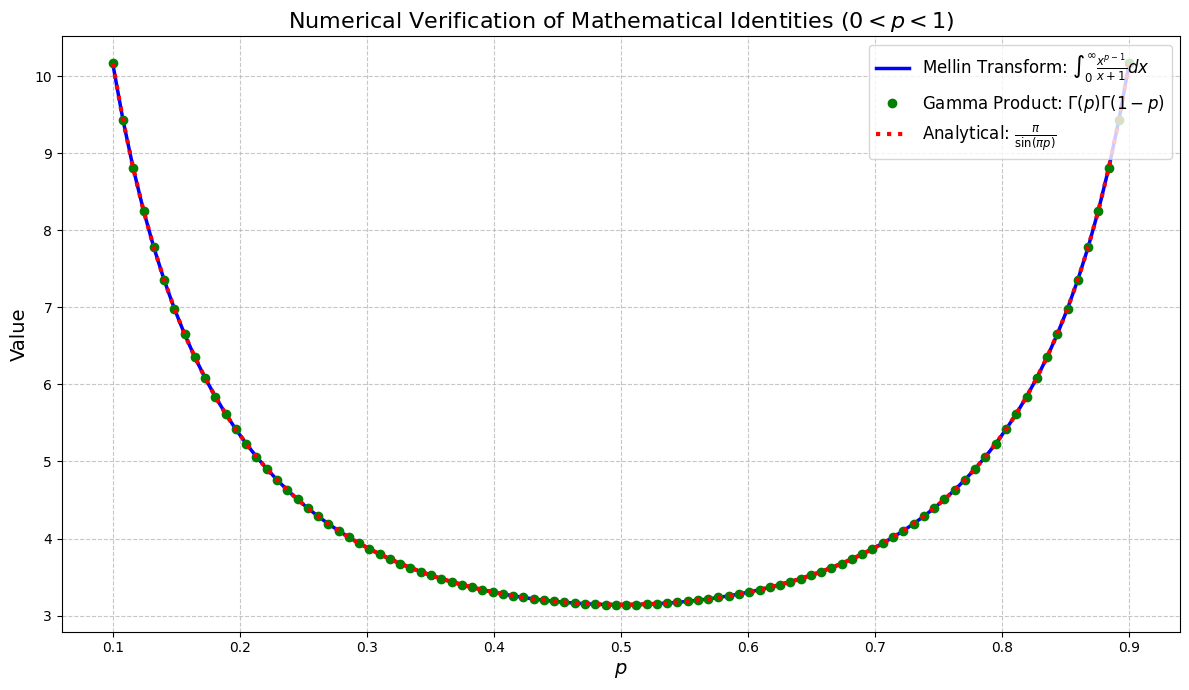

In [17]:
# ======================================================================
# Configuration
# ======================================================================
def f(x):
    return 1 / (x + 1)

p_values = np.linspace(0.1, 0.9, 100)  # Common p-range

# ======================================================================
# Computations
# ======================================================================
# Compute Mellin transform numerically
mt_values = [integrate.quad(lambda x: x**(p-1)*f(x), 0, np.inf, limit=1000)[0] 
             for p in p_values]

# Compute gamma product numerically
gamma_product = gamma(p_values) * gamma(1 - p_values)

# Analytical solution (common to both)
analytical = np.pi / np.sin(np.pi * p_values)

# ======================================================================
# Unified Plot
# ======================================================================
plt.figure(figsize=(12, 7))

# Plot Mellin transform results
plt.plot(p_values, mt_values, 'b-', linewidth=2.5, 
         label=r'Mellin Transform: $\int_0^\infty \frac{x^{p-1}}{x+1}dx$')

# Plot gamma product results
plt.plot(p_values, gamma_product, 'go', linewidth=2.5, 
         label=r'Gamma Product: $\Gamma(p)\Gamma(1-p)$')

# Plot analytical solution
plt.plot(p_values, analytical, 'r:', linewidth=3, 
         label=r'Analytical: $\frac{\pi}{\sin(\pi p)}$')

# Formatting
plt.xlabel('$p$', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Numerical Verification of Mathematical Identities ($0 < p < 1$)', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

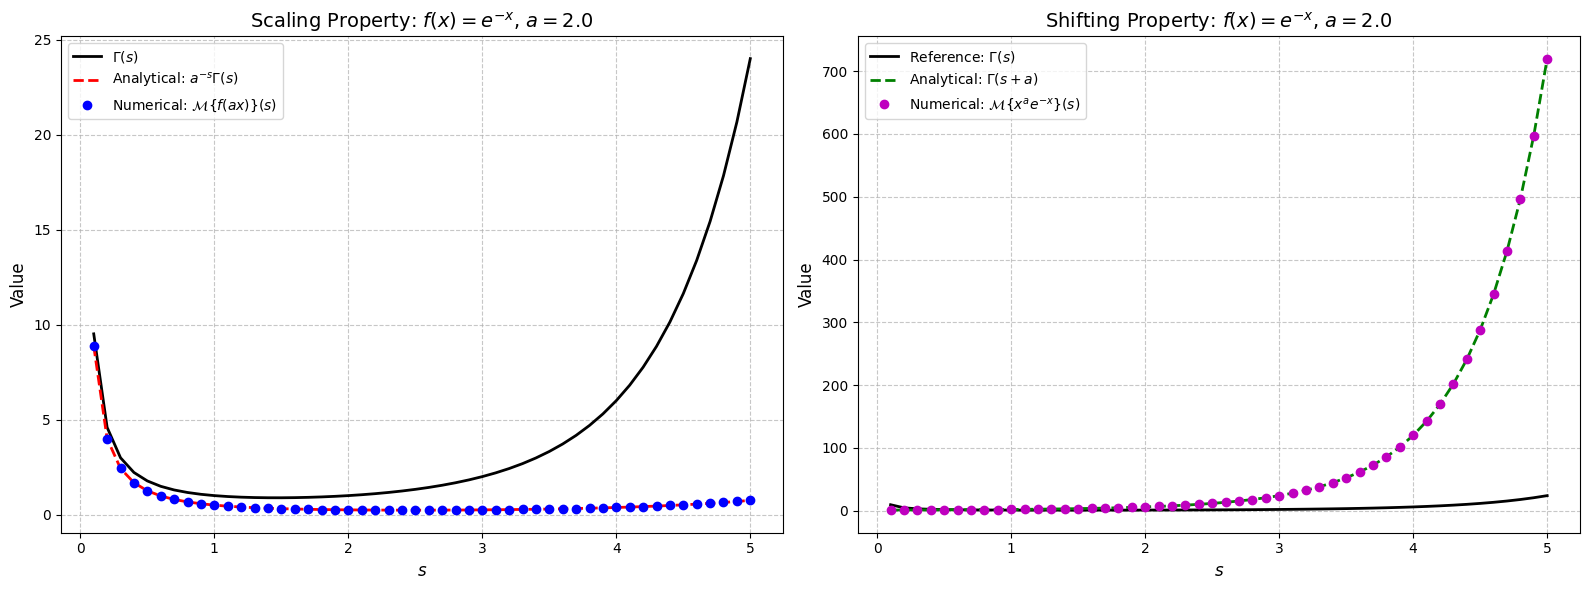

In [22]:
# ======================================================================
# Mellin Transform and Function Definitions
# ======================================================================
def mellin_transform(f, s):
    """Compute Mellin transform of f(x) at parameter s."""
    return integrate.quad(lambda x: x**(s - 1) * f(x), 0, np.inf)[0]

def f(x):
    """Original function: f(x) = e^{-x}."""
    return np.exp(-x)

def f_scaled(x, a):
    """Scaled function: f(ax) = e^{-a x}."""
    return np.exp(-a * x)

def f_shifted(x, a):
    """Shifted function: x^a * f(x)."""
    return x**a * f(x)

# ======================================================================
# Parameters and Computations
# ======================================================================
a = 2.0  # Scaling/shifting parameter
s_values = np.linspace(0.1, 5, 50)  # Avoid poles at s ≤ 0 and s + a ≤ 0

# Compute Gamma function values
gamma_original = gamma(s_values)

# Scaling Property: Mellin transform of f(ax) = a^{-s} Γ(s)
mt_scaled_numerical = np.array([mellin_transform(lambda x: f_scaled(x, a), s) 
                              for s in s_values])
mt_scaled_analytical = a**(-s_values) * gamma_original

# Shifting Property: Mellin transform of x^a f(x) = Γ(s + a)
mt_shifted_numerical = np.array([mellin_transform(lambda x: f_shifted(x, a), s) 
                               for s in s_values])
mt_shifted_analytical = gamma(s_values + a)

# ======================================================================
# Plot Results in Subplots
# ======================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Scaling Property and Gamma Function
ax1.plot(s_values, gamma_original, 'k-', lw=2, label=r'$\Gamma(s)$')
ax1.plot(s_values, mt_scaled_analytical, 'r--', lw=2, 
         label=r'Analytical: $a^{-s}\Gamma(s)$')
ax1.plot(s_values, mt_scaled_numerical, 'bo', markersize=6, 
         label='Numerical: $\mathcal{M}\{f(ax)\}(s)$')
ax1.set_xlabel('$s$', fontsize=12)
ax1.set_ylabel('Value', fontsize=12)
ax1.set_title(f'Scaling Property: $f(x) = e^{{-x}}$, $a = {a}$', fontsize=14)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Subplot 2: Shifting Property and Gamma Function
ax2.plot(s_values, gamma_original, 'k-', lw=2, label=r'Reference: $\Gamma(s)$')  # Reference line
ax2.plot(s_values, mt_shifted_analytical, 'g--', lw=2, 
         label=r'Analytical: $\Gamma(s + a)$')  # Correct shifted analytical
ax2.plot(s_values, mt_shifted_numerical, 'mo', markersize=6, 
         label=r'Numerical: $\mathcal{M}\{x^a e^{-x}\}(s)$')  # Correct numerical label
ax2.set_title(f'Shifting Property: $f(x) = e^{{-x}}$, $a = {a}$', fontsize=14)
ax2.set_xlabel('$s$', fontsize=12)
ax2.set_ylabel('Value', fontsize=12)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8432\4179857430.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  return term1 / term2
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8432\4179857430.py:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, 0, np.inf, limit=50)[0]


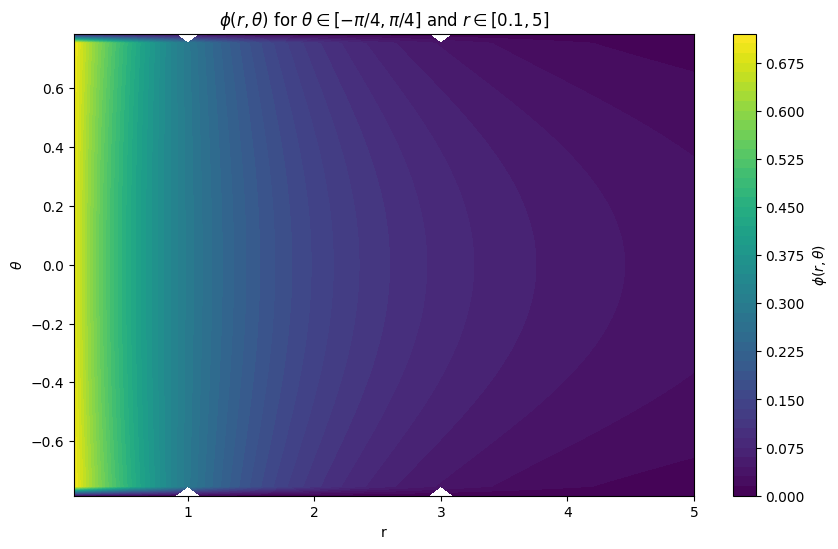

In [ ]:


# Define h(r, θ) as per the equations
def h_function(r, theta, alpha):
    n = np.pi / (2 * alpha)
    term1 = (r**n) * (1 + r**(2 * n)) * np.cos(n * theta)
    term2 = 1 + 2 * r**(2 * n) * np.cos(2 * n * theta) + r**(4 * n)
    return term1 / term2

# Define φ(r, θ) using the convolution property
def phi_function(r, theta, alpha, f):
    def integrand(xi):
        h_val = h_function(r / xi, theta, alpha)
        return f(xi) * h_val / xi
    return quad(integrand, 0, np.inf, limit=50)[0]

# Example boundary condition f(ξ) (can modify this as needed)
def f_function(xi):
    return np.exp(-xi)  # Decaying function

# Define the range for θ and r
alpha = np.pi / 4
theta_values = np.linspace(-alpha, alpha, 50)  # θ in [-π/4, π/4]
r_values = np.linspace(0.1, 5, 50)  # r in [0.1, 5]

# Compute φ(r, θ) for the grid
phi_values = np.zeros((len(r_values), len(theta_values)))
for i, r in enumerate(r_values):
    for j, theta in enumerate(theta_values):
        phi_values[i, j] = phi_function(r, theta, alpha, f_function)

# Plot φ(r, θ)
R, THETA = np.meshgrid(r_values, theta_values)
fig = plt.figure(figsize=(10, 6))
ax = plt.contourf(R, THETA, phi_values.T, levels=50, cmap='viridis')
plt.colorbar(ax, label=r'$\phi(r, \theta)$')
plt.title(r'$\phi(r, \theta)$ for $\theta \in [-\pi/4, \pi/4]$ and $r \in [0.1, 5]$')
plt.xlabel('r')
plt.ylabel(r'$\theta$')
plt.show()
